# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd

# Load the dataset and set 'Id' as the index
ames = pd.read_csv('ames.csv', index_col=0)

# Display the first few rows to verify
print(ames.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [3]:
# Your code here - 
# check the data types and non-null counts
print(ames.info())

# Display the summary statistics of the dataset
print(ames.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [4]:
# Your code here - drop columns with missing data

ames = ames.dropna(axis = 1)

# Checking the shape to see how many columns remain
print(ames.shape)

# Display the first few rows again
print(ames.head())

(1460, 61)
    MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                       
1           60       RL     8450   Pave      Reg         Lvl    AllPub   
2           20       RL     9600   Pave      Reg         Lvl    AllPub   
3           60       RL    11250   Pave      IR1         Lvl    AllPub   
4           70       RL     9550   Pave      IR1         Lvl    AllPub   
5           60       RL    14260   Pave      IR1         Lvl    AllPub   

   LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                   ...                                       
1     Inside       Gtl      CollgCr  ...             0         0           0   
2        FR2       Gtl      Veenker  ...             0         0           0   
3     Inside       Gtl      CollgCr  ...             0         0           0   
4     Corner       Gtl      Crawfor  ...           272         0      

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

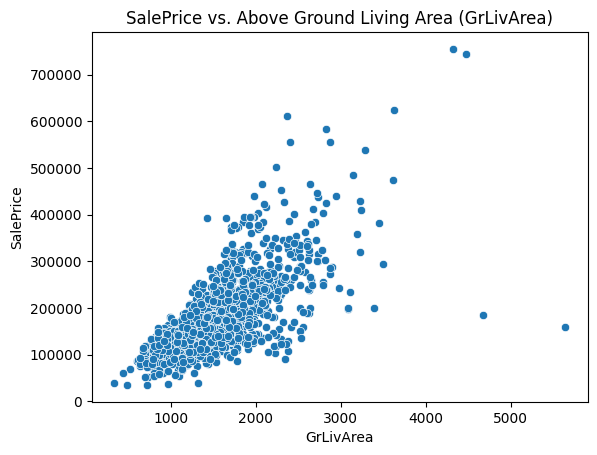

In [5]:
# Your code here - continuous numeric predictor

import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(x='GrLivArea', y='SalePrice', data=ames)
plt.title('SalePrice vs. Above Ground Living Area (GrLivArea)')
plt.show()

### Discrete Numeric Predictor

In [12]:
# Your code here - discrete numeric predictor


### String Categorical Predictor

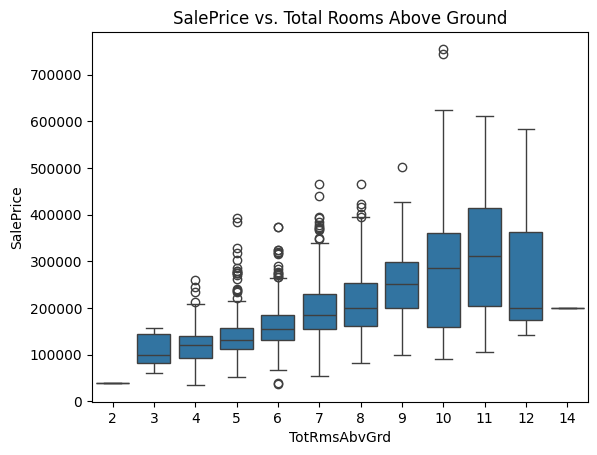

In [6]:
# Your code here - string categorical predictor
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=ames)
plt.title('SalePrice vs. Total Rooms Above Ground')
plt.show()

### Discrete Categorical Predictor

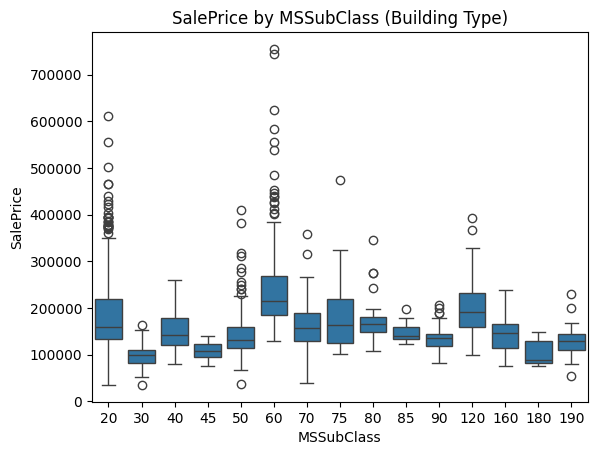

In [7]:
# Your code here - discrete categorical predictor
sns.boxplot(x='MSSubClass', y='SalePrice', data=ames)
plt.title('SalePrice by MSSubClass (Building Type)')
plt.show()

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [8]:
# Your code here - prepare X and y, including one-hot encoding
# Subset the predictors
X = ames[['GrLivArea', 'TotRmsAbvGrd', 'Neighborhood']]
y = ames['SalePrice']

# One-hot encode categorical predictor(s)
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

In [10]:
# Your answer here - which category or categories were dropped?
print(sorted(ames['Neighborhood'].unique()))

['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [14]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 2.5 MB/s eta 0:00:00a 0:00:01


In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [16]:
# Your code here - build a regression model and display results

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Build and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared on test set: {r2:.3f}")

# Display model coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nModel Coefficients:")
print(coefficients.sort_values(ascending=False))

R-squared on test set: 0.756

Model Coefficients:
Neighborhood_NridgHt    81334.778994
Neighborhood_StoneBr    79011.828924
Neighborhood_NoRidge    52399.043343
Neighborhood_Veenker    46566.316942
Neighborhood_Somerst    23271.586870
Neighborhood_Timber     22707.996010
Neighborhood_CollgCr     3229.925374
GrLivArea                  81.484888
Neighborhood_ClearCr     -593.487643
TotRmsAbvGrd            -2009.806062
Neighborhood_Crawfor   -11452.227843
Neighborhood_Gilbert   -12001.307267
Neighborhood_SawyerW   -20421.255177
Neighborhood_NWAmes    -25039.166132
Neighborhood_Mitchel   -27411.282314
Neighborhood_NPkVill   -33940.871124
Neighborhood_NAmes     -36003.591218
Neighborhood_Sawyer    -38747.603698
Neighborhood_BrkSide   -50861.133108
Neighborhood_Blueste   -54321.955137
Neighborhood_Edwards   -56825.882143
Neighborhood_IDOTRR    -65955.924377
Neighborhood_BrDale    -67461.354351
Neighborhood_MeadowV   -69549.260086
Neighborhood_OldTown   -70507.911253
Neighborhood_SWISU     -8

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

In [17]:
!pip install statsmodels

In [24]:
print(X.dtypes.value_counts())

bool     24
int64     2
Name: count, dtype: int64


In [25]:
# Convert all boolean columns to integers
X = X.astype(int)

# Add constant term for intercept
X_sm = sm.add_constant(X)

# Fit the model
model_sm = sm.OLS(y, X_sm).fit()



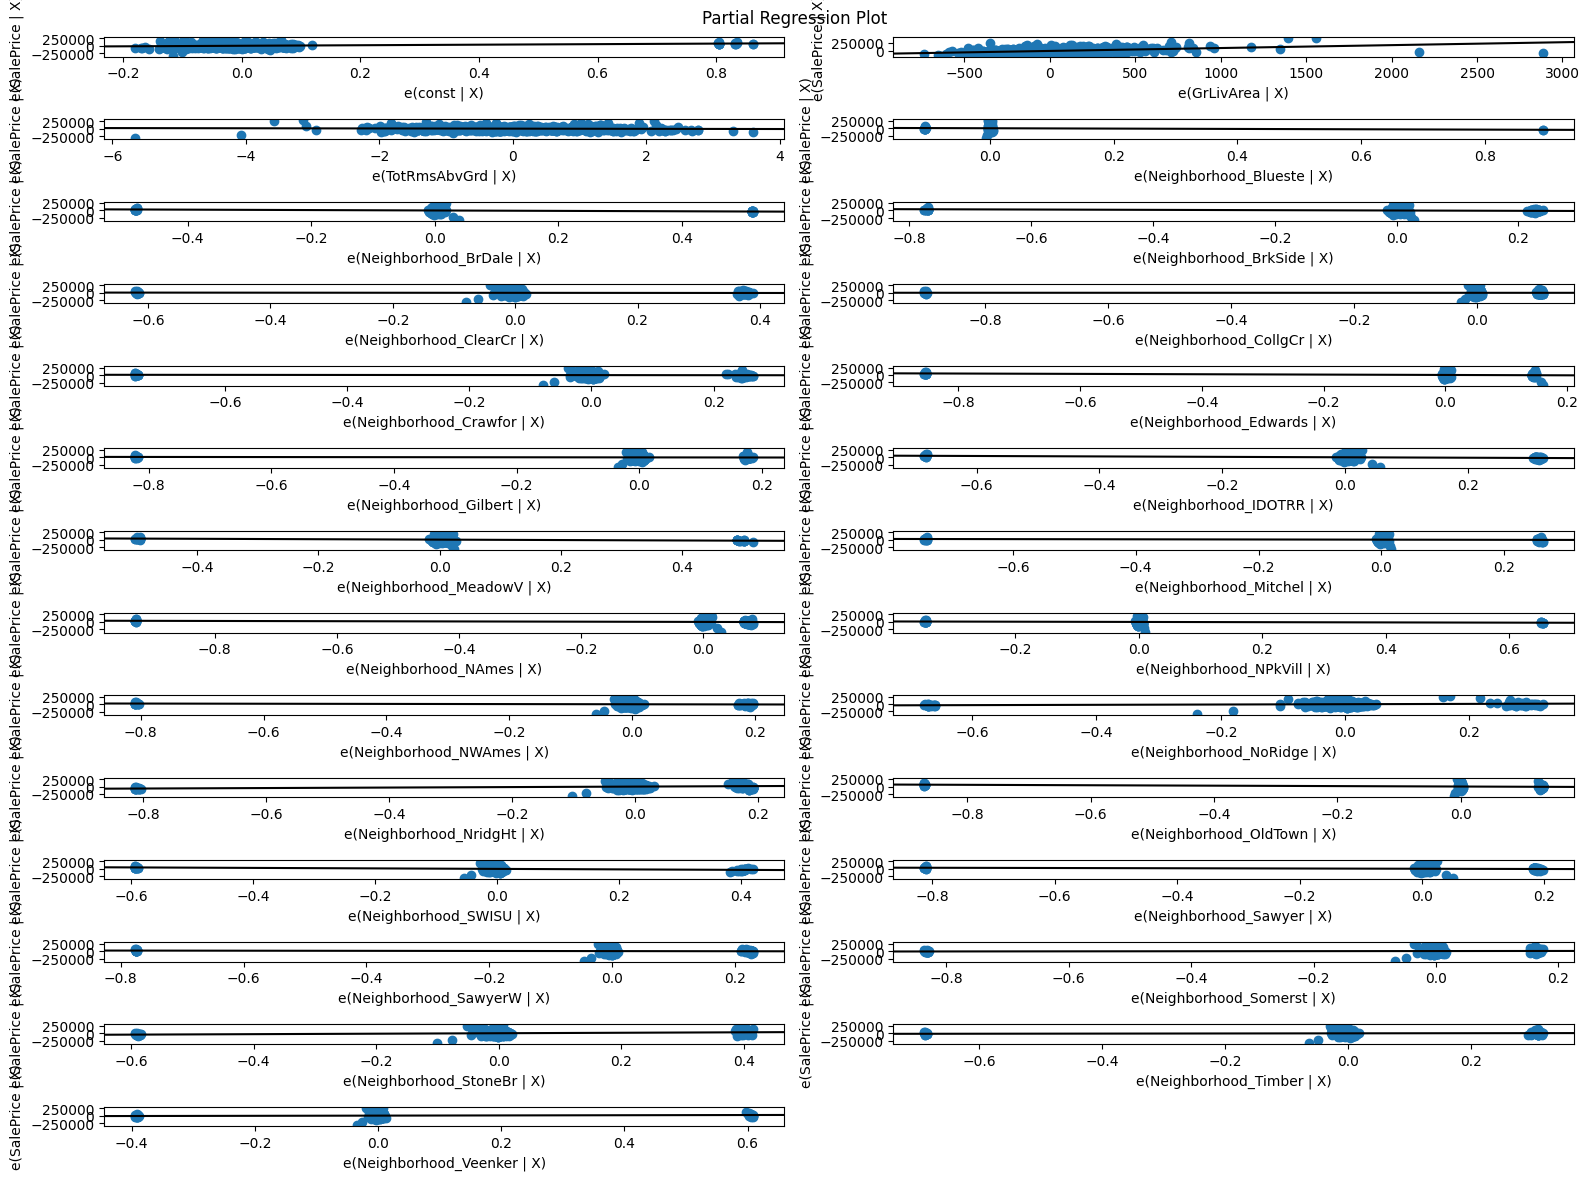

In [26]:
# Your code here - create partial regression plots
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_partregress_grid

# Load and prep data
ames = pd.read_csv('ames.csv', index_col=0)
ames = ames.dropna(axis=1)
X = ames[['GrLivArea', 'TotRmsAbvGrd', 'Neighborhood']]
y = ames['SalePrice']

# One-hot encode 'Neighborhood' and convert all to numeric
X = pd.get_dummies(X, drop_first=True)
X = X.astype(int)

# Add constant term for intercept
X_sm = sm.add_constant(X)

# Fit the model using statsmodels
model_sm = sm.OLS(y, X_sm).fit()

# Plot partial regression plots for all features
fig = plt.figure(figsize=(16, 12))
plot_partregress_grid(model_sm, fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [33]:
# Your code here - calculate an error-based metric

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions from the model
y_pred = model_sm.predict(X_sm)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 27258.91
Root Mean Squared Error (RMSE): 40517.49


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

# Your answer here
The model includes predictors such as GrLivArea (Above-ground living area), TotRmsAbvGrd (Total rooms above ground), and Neighborhood (with one-hot encoding).
The Adjusted R-Squared indicates how well the model explains SalePrice, but there's still room for improvement.
Partial Regression Plots show that GrLivArea and TotRmsAbvGrd have strong linear relationships with SalePrice, while the Neighborhood variable has varying effects depending on location.

Error Metrics:
MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) are used to assess the model’s prediction accuracy. Lower values indicate better performance.
These metrics suggest that while the model is helpful, the error is still significant, indicating room for improvement.

Next Steps to Improve the Model:

Feature Engineering: Add interaction terms or polynomial terms for non-linear relationships.
Address Outliers: Handle extreme values that may be impacting model accuracy.
Advanced Models: Try regularized regression models (Ridge/Lasso) or tree-based methods (Random Forest, Gradient Boosting).
Cross-Validation: Use cross-validation to ensure the model generalizes well to unseen data.
Hyperparameter Tuning: Tune hyperparameters for more complex models to improve performance.



## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [39]:
# Your code here




## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.